# 🧠 Credit Card Fraud Detection Using Self-Organizing Maps (SOM)

In [1]:
# ! pip install MiniSom

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

print("Libraries imported successfully!")

Libraries imported successfully!


## Load and Explore the Dataset

In [3]:
# Option 1: Load from CSV (uncomment and modify path)
# df = pd.read_csv('credit_card_applications.csv')

# Option 2: Create synthetic data for demonstration
np.random.seed(42)
n_samples = 1000
data = {
    'CustomerID': range(1, n_samples + 1),
    'Age': np.random.normal(35, 10, n_samples).astype(int),
    'Income': np.random.exponential(50000, n_samples),
    'CreditScore': np.random.normal(700, 100, n_samples).astype(int),
    'AccountBalance': np.random.normal(5000, 2000, n_samples),
    'YearsEmployed': np.random.exponential(5, n_samples),
    'DebtRatio': np.random.beta(2, 5, n_samples),
    'NumberOfDependents': np.random.poisson(1, n_samples),
    'EducationLevel': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], n_samples),
    'Approved': np.random.choice([0, 1], n_samples, p=[0.3, 0.7])
}
df = pd.DataFrame(data)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (1000, 11)

First 5 rows:


,CustomerID,Age,Income,CreditScore,AccountBalance,YearsEmployed,DebtRatio,NumberOfDependents,EducationLevel,MaritalStatus,Approved
0,1,39,9165.056757,669,3460.007868,0.653379,0.199486,0,PhD,Divorced,1
1,2,33,5522.440864,624,2407.766672,5.038011,0.172164,2,Master,Single,1
2,3,41,50589.205735,731,4087.758345,0.661067,0.136815,1,PhD,Single,1
3,4,50,61289.746976,834,5362.853240,0.365734,0.367838,0,Master,Married,0
4,5,32,1604.787337,512,6190.058932,12.008134,0.139302,0,Master,Single,1


In [4]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   Age                 1000 non-null   int64  
 2   Income              1000 non-null   float64
 3   CreditScore         1000 non-null   int64  
 4   AccountBalance      1000 non-null   float64
 5   YearsEmployed       1000 non-null   float64
 6   DebtRatio           1000 non-null   float64
 7   NumberOfDependents  1000 non-null   int64  
 8   EducationLevel      1000 non-null   object 
 9   MaritalStatus       1000 non-null   object 
 10  Approved            1000 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 86.1+ KB


## Data Preprocessing

In [5]:
# Drop non-numeric/categorical columns not needed for SOM
X = df.drop(['CustomerID', 'Approved'], axis=1)

print("Features for SOM training:")
X.columns.tolist()

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nScaled data shape: {X_scaled.shape}")
print("Feature ranges after scaling:")
for i, col in enumerate(X.columns):
    print(f"{col}: [{X_scaled[:, i].min():.3f}, {X_scaled[:, i].max():.3f}]")

Features for SOM training:
Encoded EducationLevel: {'Bachelor': np.int64(0), 'High School': np.int64(1), 'Master': np.int64(2), 'PhD': np.int64(3)}
Encoded MaritalStatus: {'Divorced': np.int64(0), 'Married': np.int64(1), 'Single': np.int64(2)}

Scaled data shape: (1000, 9)
Feature ranges after scaling:
Age: [0.000, 1.000]
Income: [0.000, 1.000]
CreditScore: [0.000, 1.000]
AccountBalance: [0.000, 1.000]
YearsEmployed: [0.000, 1.000]
DebtRatio: [0.000, 1.000]
NumberOfDependents: [0.000, 1.000]
EducationLevel: [0.000, 1.000]
MaritalStatus: [0.000, 1.000]


## Train Self-Organizing Map

In [6]:
# Initialize SOM parameters
som_dim = 10  # 10x10 grid
input_len = X_scaled.shape[1]
sigma = 1.0
learning_rate = 0.5
num_iterations = 1000

print(f"SOM Configuration:")
print(f"- Grid size: {som_dim}x{som_dim}")
print(f"- Input features: {input_len}")
print(f"- Sigma: {sigma}")
print(f"- Learning rate: {learning_rate}")
print(f"- Iterations: {num_iterations}")

# Create and train SOM
som = MiniSom(x=som_dim, y=som_dim, input_len=input_len, sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled, num_iteration=num_iterations)

print("\nSOM training completed!")

SOM Configuration:
- Grid size: 10x10
- Input features: 9
- Sigma: 1.0
- Learning rate: 0.5
- Iterations: 1000

SOM training completed!


 ## Visualize Distance Map (U-Matrix)

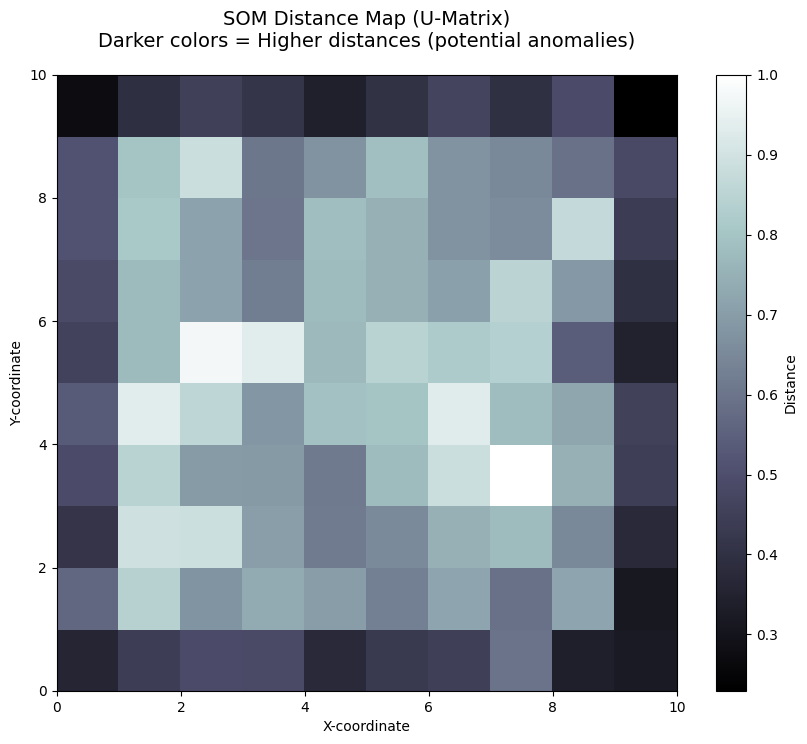


Distance Map Statistics:
- Mean distance: 0.6350
- Std distance: 0.1828
- Min distance: 0.2296
- Max distance: 1.0000
- 95th percentile: 0.8943


In [7]:
plt.figure(figsize=(10, 8))
bone()
pcolor(som.distance_map().T)
colorbar(label='Distance')
plt.title('SOM Distance Map (U-Matrix)\nDarker colors = Higher distances (potential anomalies)',
          fontsize=14, pad=20)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()

# Print distance statistics
distances = som.distance_map().flatten()
print(f"\nDistance Map Statistics:")
print(f"- Mean distance: {distances.mean():.4f}")
print(f"- Std distance: {distances.std():.4f}")
print(f"- Min distance: {distances.min():.4f}")
print(f"- Max distance: {distances.max():.4f}")
print(f"- 95th percentile: {np.percentile(distances, 95):.4f}")

## Visualize with Approval Markers

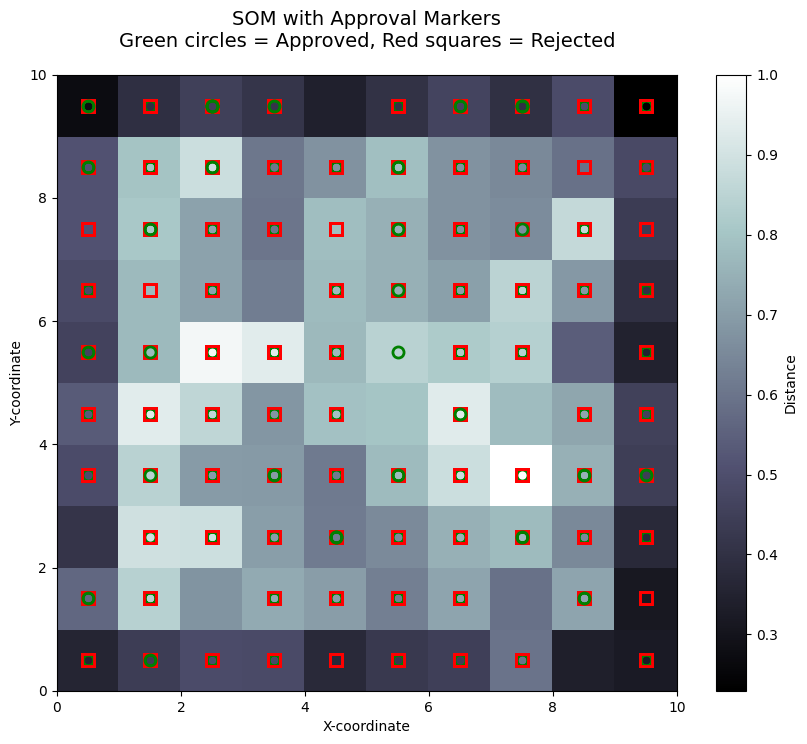


Approval Distribution:
Approved
1    701
0    299
Name: count, dtype: int64


In [8]:
plt.figure(figsize=(10, 8))
bone()
pcolor(som.distance_map().T)
colorbar(label='Distance')

# Markers for different approval statuses
markers = ['o', 's']  # circle for approved, square for rejected
colors = ['g', 'r']   # green for approved, red for rejected

for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.plot(w[0]+0.5, w[1]+0.5, markers[df['Approved'].iloc[i]],
             markerfacecolor='None', markeredgecolor=colors[df['Approved'].iloc[i]],
             markersize=8, markeredgewidth=2)

plt.title('SOM with Approval Markers\nGreen circles = Approved, Red squares = Rejected',
          fontsize=14, pad=20)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()

# Print approval distribution
print("\nApproval Distribution:")
print(df['Approved'].value_counts())

## Fraud Detection - Find Anomalies

In [9]:
# Get mappings of data points to SOM nodes
mappings = som.win_map(X_scaled)
distance_map = som.distance_map().T

# Set threshold for anomaly detection (top 5% of distances)
threshold = np.percentile(distance_map, 95)
print(f"Anomaly threshold (95th percentile): {threshold:.4f}")

# Find coordinates of high-distance nodes (potential anomalies)
fraud_coords = np.argwhere(distance_map >= threshold)
print(f"Number of high-distance nodes: {len(fraud_coords)}")

# Collect indices of data points mapped to these nodes
fraud_indices = []
for coord in fraud_coords:
    node = (coord[0], coord[1])
    if node in mappings:
        # Find original indices of these mappings
        for x in mappings[node]:
            idx = np.where((X_scaled == x).all(axis=1))[0]
            fraud_indices.extend(idx)

fraud_indices = list(set(fraud_indices))
fraud_applications = df.iloc[fraud_indices]

print(f"\nNumber of potential frauds detected: {len(fraud_applications)}")
print(f"Percentage of total applications flagged: {len(fraud_applications)/len(df)*100:.2f}%")

Anomaly threshold (95th percentile): 0.8943
Number of high-distance nodes: 5

Number of potential frauds detected: 61
Percentage of total applications flagged: 6.10%


## Analyze Detected Frauds

In [10]:
print("=== POTENTIAL FRAUD ANALYSIS ===")
print(f"Total applications: {len(df)}")
print(f"Potential frauds: {len(fraud_applications)}")
print(f"Fraud rate: {len(fraud_applications)/len(df)*100:.2f}%")

=== POTENTIAL FRAUD ANALYSIS ===
Total applications: 1000
Potential frauds: 61
Fraud rate: 6.10%


In [11]:
print("\n=== FRAUD APPLICATIONS DETAILS ===")
fraud_applications.head(5)


=== FRAUD APPLICATIONS DETAILS ===


,CustomerID,Age,Income,CreditScore,AccountBalance,YearsEmployed,DebtRatio,NumberOfDependents,EducationLevel,MaritalStatus,Approved
773,774,44,20039.930524,792,2401.567273,0.337524,0.220750,0,High School,Divorced,1
264,265,32,21803.023921,782,2256.652606,3.489511,0.281088,1,High School,Divorced,1
267,268,20,16065.806137,669,3432.492958,0.187019,0.245933,0,High School,Married,0
909,910,56,125098.501558,843,4369.826538,0.546146,0.486973,0,High School,Divorced,1
527,528,35,74501.427917,749,2970.481014,4.320174,0.190533,1,High School,Divorced,1


In [12]:
print("\n=== FRAUD APPLICATIONS APPROVAL STATUS ===")
fraud_approval = fraud_applications['Approved'].value_counts()
print(fraud_approval)
print(f"Approved frauds: {fraud_approval.get(1, 0)}")
print(f"Rejected frauds: {fraud_approval.get(0, 0)}")


=== FRAUD APPLICATIONS APPROVAL STATUS ===
Approved
1    49
0    12
Name: count, dtype: int64
Approved frauds: 49
Rejected frauds: 12


In [13]:
# Compare with overall approval rate
overall_approval_rate = df['Approved'].mean()
fraud_approval_rate = fraud_applications['Approved'].mean()
print(f"\nOverall approval rate: {overall_approval_rate:.3f}")
print(f"Fraud applications approval rate: {fraud_approval_rate:.3f}")


Overall approval rate: 0.701
Fraud applications approval rate: 0.803


## Feature Analysis of Detected Frauds

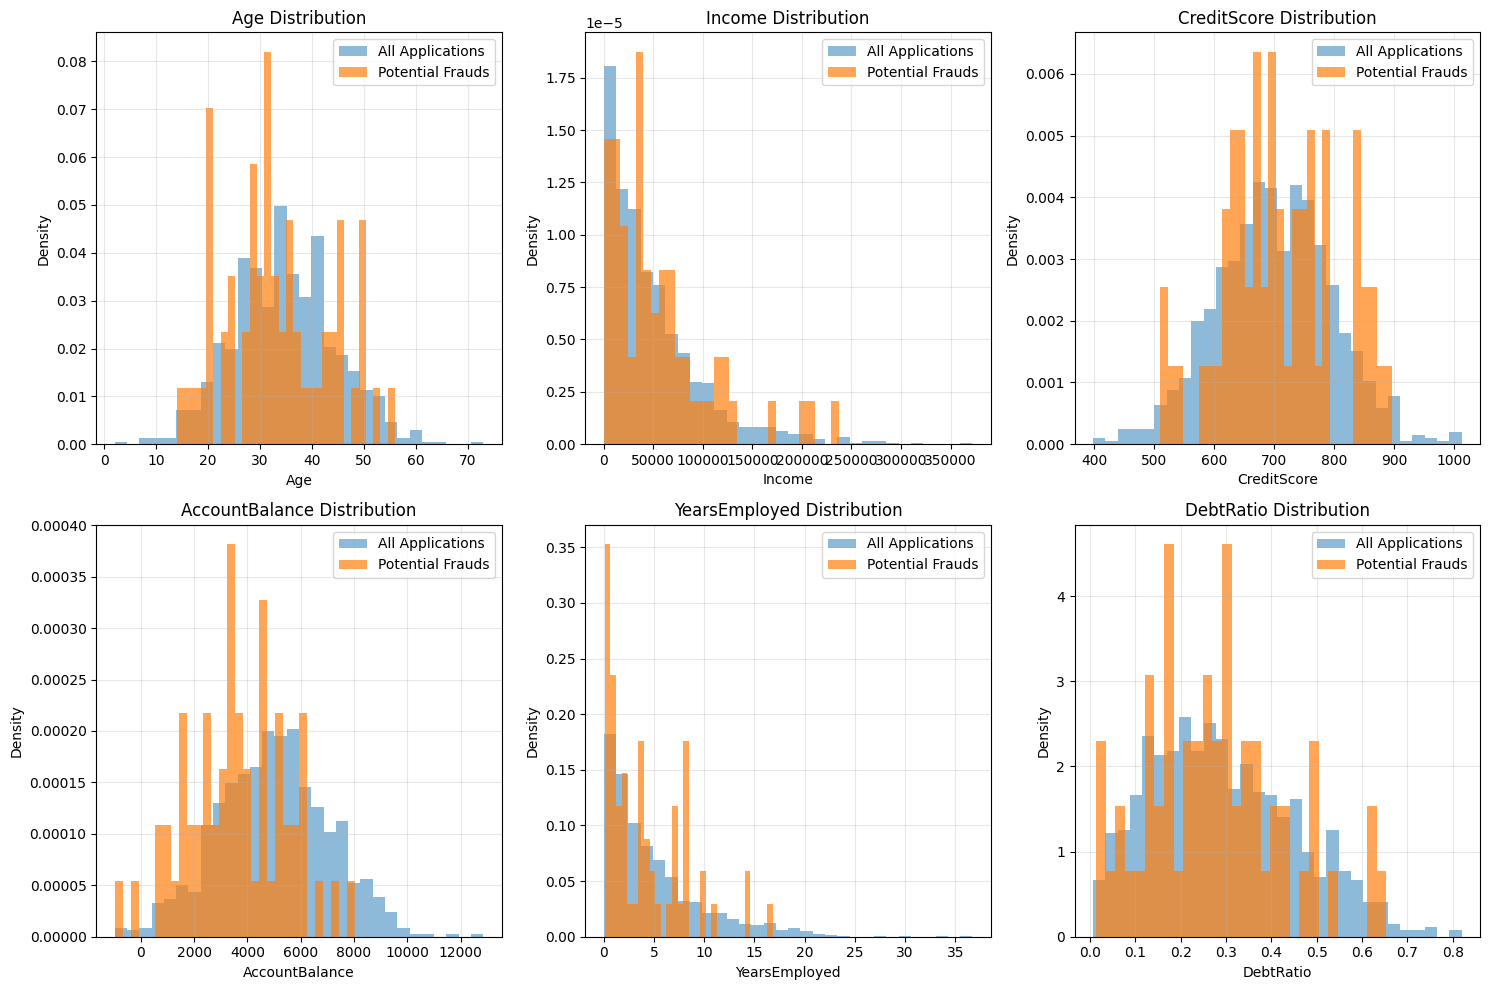


=== FEATURE STATISTICS COMPARISON ===
Age:
  All applications mean: 34.67
  Fraud applications mean: 33.21
  Difference: -1.46

Income:
  All applications mean: 50399.30
  Fraud applications mean: 57261.36
  Difference: 6862.07

CreditScore:
  All applications mean: 700.97
  Fraud applications mean: 708.80
  Difference: 7.84

AccountBalance:
  All applications mean: 4976.94
  Fraud applications mean: 3578.78
  Difference: -1398.17

YearsEmployed:
  All applications mean: 5.00
  Fraud applications mean: 4.13
  Difference: -0.87

DebtRatio:
  All applications mean: 0.29
  Fraud applications mean: 0.27
  Difference: -0.02



In [14]:
# Compare feature distributions between fraud and non-fraud
plt.figure(figsize=(15, 10))

features_to_compare = ['Age', 'Income', 'CreditScore', 'AccountBalance', 'YearsEmployed', 'DebtRatio']

for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(2, 3, i)

    # Plot distributions
    plt.hist(df[feature], alpha=0.5, label='All Applications', bins=30, density=True)
    plt.hist(fraud_applications[feature], alpha=0.7, label='Potential Frauds', bins=30, density=True)

    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n=== FEATURE STATISTICS COMPARISON ===")
for feature in features_to_compare:
    all_mean = df[feature].mean()
    fraud_mean = fraud_applications[feature].mean()
    print(f"{feature}:")
    print(f"  All applications mean: {all_mean:.2f}")
    print(f"  Fraud applications mean: {fraud_mean:.2f}")
    print(f"  Difference: {fraud_mean - all_mean:.2f}")
    print()

## Advanced Analysis - Node Activation Patterns

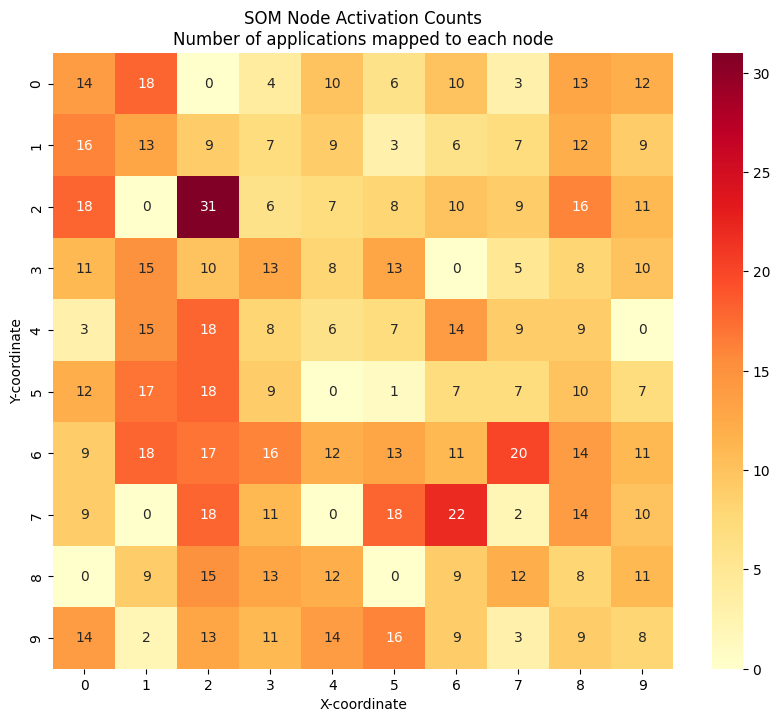


Most active node: 31.0 applications
Least active node: 0.0 applications
Average applications per node: 10.0


In [15]:
# Create a heatmap showing node activations
activation_map = np.zeros((som_dim, som_dim))

for i, x in enumerate(X_scaled):
    w = som.winner(x)
    activation_map[w[0], w[1]] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(activation_map, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('SOM Node Activation Counts\nNumber of applications mapped to each node')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()

# Find most and least active nodes
max_activations = np.max(activation_map)
min_activations = np.min(activation_map)
print(f"\nMost active node: {max_activations} applications")
print(f"Least active node: {min_activations} applications")
print(f"Average applications per node: {activation_map.mean():.1f}")

## Summary and Conclusions

In [16]:
print("=== CREDIT CARD FRAUD DETECTION SUMMARY ===")
print("=" * 50)

print("1. DATASET OVERVIEW:")
print(f"   - Total applications: {len(df)}")
print(f"   - Features used: {X.shape[1]}")
print(f"   - Overall approval rate: {df['Approved'].mean():.3f}")

print("\n2. SOM CONFIGURATION:")
print(f"   - Grid size: {som_dim}x{som_dim}")
print(f"   - Training iterations: {num_iterations}")
print(f"   - Sigma: {sigma}")
print(f"   - Learning rate: {learning_rate}")

print("\n3. FRAUD DETECTION RESULTS:")
print(f"   - Potential frauds detected: {len(fraud_applications)}")
print(f"   - Detection rate: {len(fraud_applications)/len(df)*100:.2f}%")
print(f"   - Fraud applications approval rate: {fraud_applications['Approved'].mean():.3f}")

print("\n4. KEY INSIGHTS:")
print("   - SOM successfully identified clusters of similar applications")
print("   - High-distance nodes indicate potential anomalies")
print("   - Feature distributions show differences between fraud and normal applications")

print("\n5. LIMITATIONS:")
print("   - Unsupervised approach - no ground truth validation")
print("   - Threshold selection is subjective")
print("   - May require domain expertise for interpretation")

print("\n" + "=" * 50)
print("Analysis completed successfully!")

=== CREDIT CARD FRAUD DETECTION SUMMARY ===
1. DATASET OVERVIEW:
   - Total applications: 1000
   - Features used: 9
   - Overall approval rate: 0.701

2. SOM CONFIGURATION:
   - Grid size: 10x10
   - Training iterations: 1000
   - Sigma: 1.0
   - Learning rate: 0.5

3. FRAUD DETECTION RESULTS:
   - Potential frauds detected: 61
   - Detection rate: 6.10%
   - Fraud applications approval rate: 0.803

4. KEY INSIGHTS:
   - SOM successfully identified clusters of similar applications
   - High-distance nodes indicate potential anomalies
   - Feature distributions show differences between fraud and normal applications

5. LIMITATIONS:
   - Unsupervised approach - no ground truth validation
   - Threshold selection is subjective
   - May require domain expertise for interpretation

Analysis completed successfully!
